### Estatisticas de Acuracia das previsoes

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

In [95]:
# Exemplo
reais = np.array([1, 2, 3, 5, 6, 8, 9])
previstos = np.array([1, 3, 3, 4, 6, 7, 9])

In [96]:
# Calculo do Erro
erro = reais - previstos

# Calculo do Erro Medio
merror = sum(erro)/len(erro)
print(merror)

# Calculo do Erro Absoluto Medio
mae = mean_absolute_error(reais, previstos)
print(mae)

# Calculo da Raiz Quadrada do Erro Medio
# O mean_squared_error(squared=False) foi substituido por root_mean_squared_error
rmse = root_mean_squared_error(reais, previstos)
print(rmse)

# Calculo do Erro Percentual Medio
erro_percentual = (reais - previstos)/reais
mpe = me = sum(erro_percentual)/len(erro)*100
print(mpe)

# Calculo do Erro Absoluto Percentual Medio
mape = mean_absolute_percentage_error(reais,previstos)*100
print(mape)


0.14285714285714285
0.42857142857142855
0.6546536707079771
-2.5
11.785714285714285


Calculo do Coeficiente U de Theil

In [97]:
# Funcao para calculo do Coeficiente U de Theil (selecionar todos os comandos)
def division(measure, previousI):
  return measure / previousI

def power(measure):
  return np.power(measure, 2)

def summation(measure):
  return np.sum(measure)

def mean(N, measure):
  return (1/N) * measure

def sqrt(measure):
  return np.sqrt(measure)

def computeTheilU2(y_true, y_pred):
    N = len(y_true)
    
    subtractionNumerator = y_pred[1:] - y_true[1:]
    divisionNumerator = division(subtractionNumerator, y_true[:-1])
    powerNumerator = power(divisionNumerator)
    summationNumerator = summation(powerNumerator)
    meanNumerator = mean(N, summationNumerator)
    numerator = sqrt(meanNumerator)
    
    subtractionDenominator = y_true[1:] - y_true[:-1]
    powerDenominator = power(division(subtractionDenominator, y_true[:-1]))
    denominator = sqrt(mean(N, summation(powerDenominator)))
        
    theilU2 = numerator / denominator
    
    return theilU2

theil = computeTheilU2(reais,previstos)

theil

np.float64(0.7822515361226225)

In [98]:
# In[62]: Exibir as metricas de acuracia (Selecione todos os comandos)
print(" Indicadores de Acuracia")
print(f'ME - Mean Error: {merror:.2f}')
print(f'MAE - Mean Absolute Error: {mae:.2f}')
print(f'RMSE - Raiz Quadrada do Erro Medio: {rmse:.2f}')
print(f'MPE - Mean Percentage Error: {mpe:.2f}')
print(f'MAPE - Mean Absolute Percentage Error: {mape:.2f}')
print(f'THEIL_U - Theils Inequality Coefficient: {theil:.4f}')

 Indicadores de Acuracia
ME - Mean Error: 0.14
MAE - Mean Absolute Error: 0.43
RMSE - Raiz Quadrada do Erro Medio: 0.65
MPE - Mean Percentage Error: -2.50
MAPE - Mean Absolute Percentage Error: 11.79
THEIL_U - Theils Inequality Coefficient: 0.7823


In [99]:
accuracy = accuracy_score(reais, previstos)
accuracy

0.5714285714285714

### Metodos SIMPLES de Previsao de Series Temporais

In [100]:
# Serie - Exemplo
serie = np.array([3, 5, 9, 20, 12, 17, 22, 23, 51, 41, 56, 75, 60, 75, 88])

### Metodo NAIVE 

In [101]:
# Funcao para realizar previsao naive e calcular intervalos de confianca 
# ajustados

def naive_forecast(time_series, h=3, confidence_level=0.95):
    # A ultima observacao da serie
    last_observation = time_series[-1]
    
    # Previsoes naive para h passos a  frente
    forecasts = np.array([last_observation] * h)
    
    # Calculando os erros de previsao
    errors = time_series[1:] - time_series[:-1] 
    erro2=errors*errors
    std_error =np.sqrt(erro2.mean())  # Desvio dos erros
    
    # Valor cri­tico da distribuicao normal para o ni­vel de confianca desejado
    z_value = stats.norm.ppf((1 + confidence_level) / 2)
    
    # Calculando os intervalos de confianca com ajuste para h passos a  frente
    confidence_intervals = [
        (forecast - z_value * std_error * np.sqrt(step+1), 
         forecast + z_value * std_error * np.sqrt(step+1))
        for step, forecast in enumerate(forecasts)
    ]
    
    # Criando um DataFrame para armazenar previsoes e intervalos de confianca
    forecast_df = pd.DataFrame({
        "Previsao": forecasts,
        "IC Inferior": [ci[0] for ci in confidence_intervals],
        "IC Superior": [ci[1] for ci in confidence_intervals]
    }, index=[f'T+{i+1}' for i in range(h)])
    
    return forecast_df, confidence_intervals

In [102]:
# In[65]: Funcao para plotar a serie temporal com previsoes e intervalos de confianca 
def plot_naive_forecast(time_series, forecast_df):
    n = len(time_series)
    h = len(forecast_df)
    
    plt.figure(figsize=(10, 6))
    
    # Plotando os valores reais da serie temporal
    plt.plot(range(n), time_series, label='Serie Temporal', color='blue')
    
    # Plotando os valores previstos
    plt.plot(range(n-1, n+h), np.concatenate(([time_series[-1]], 
                                              forecast_df['Previsao'])), 
             label='Previsao (Naive)', linestyle='--', marker='o', color='orange')

    # Plotando os limites inferior e superior dos intervalos de confianca
    plt.plot(range(n, n+h), forecast_df['IC Inferior'], 
             label='IC Inferior (95%)', linestyle='--', color='red')
    plt.plot(range(n, n+h), forecast_df['IC Superior'],
             label='IC Superior (95%)', linestyle='--', color='green')

    # Adicionando ro­tulos e legendas
    plt.title('Previsao Naive com Intervalos de Confianca (95%)')
    plt.xlabel('Tempo')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    
    # Exibindo o grafico
    plt.show()

In [103]:
# In[66]: Aplicando a previsao naive com intervalos de confianca ajustados
naiveforecast_df, confidence_intervals = naive_forecast(serie, h=3)

# Mostrando o DataFrame com previsoes
print(naiveforecast_df)

     Previsao  IC Inferior  IC Superior
T+1        88    62.633795   113.366205
T+2        88    52.126769   123.873231
T+3        88    44.064444   131.935556


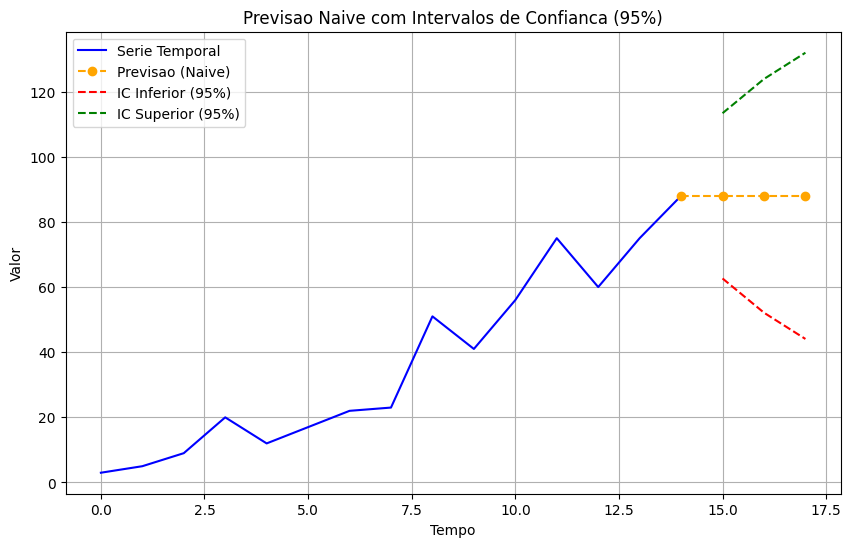

In [104]:
# Plotando os resultados com previsoes e intervalos de confianca como linhas
plot_naive_forecast(serie, naiveforecast_df)

### Metodo de previsao pela MEDIA 

In [105]:
# Funcao para realizar previsao pela media e calcular intervalos de confianca 

def forecast_with_mean(time_series, steps_ahead, confidence=0.95):
    # Calcular a media da serie
    mean_series = np.mean(time_series)
    
    # Calcular os erros (resi­duos) da previsao pela media
    errors = time_series - mean_series
    
    # Calcular o desvio padrao dos erros
    std_errors = np.std(errors, ddof=1)
    
    # Prever com base na media
    forecast = [mean_series] * steps_ahead

    # Calcular intervalo de confianca usando o desvio padrao dos erros
    n = len(time_series)
    alpha = 1 - confidence
    t_value = stats.t.ppf(1 - alpha/2, df=n-1)  
    margin_of_error = t_value * std_errors*np.sqrt(1+1/len(time_series))
    
    # Inferior e superior
    lower_bound = [mean_series - margin_of_error] * steps_ahead
    upper_bound = [mean_series + margin_of_error] * steps_ahead

    return forecast, lower_bound, upper_bound

In [106]:
# In[68]: Funcao para plotar a serie original e a previsao
def plot_forecast_with_mean(time_series, forecast, lower_bound,
                                            upper_bound, steps_ahead):
    # Plotar a serie original
    plt.plot(range(len(time_series)), time_series, label="Serie Original", 
             marker='o')
    
    # Criar eixo de tempo para previsao
    forecast_range = range(len(time_series), len(time_series) + steps_ahead)
    
    # Plotar a previsao
    plt.plot(forecast_range, forecast, label="Previsao", marker='o', 
             linestyle='--')
    
    # Plotar intervalo de confianca
    plt.fill_between(forecast_range, lower_bound, upper_bound, color='gray',
                     alpha=0.05, label='Intervalo de Confianca')
    
    # Detalhes do grafico
    plt.xlabel("Tempo")
    plt.ylabel("Valores")
    plt.legend()
    plt.title("Serie Original e Previsao com Intervalo de Confianca pela media")
    plt.show()

In [107]:
# In[69]: Definir numero de passos a  frente
h = 3

# Gerar previsao e intervalos de confianca
forecast_mean, lower_bound, upper_bound = forecast_with_mean(serie, h)

forecast_mean

# In[70]: Exibir resultados
print("Previsao", forecast_mean)
print("Limite inferior do intervalo de confianca:", lower_bound)
print("Limite superior do intervalo de confianca:", upper_bound)

Previsao [np.float64(37.13333333333333), np.float64(37.13333333333333), np.float64(37.13333333333333)]
Limite inferior do intervalo de confianca: [np.float64(-25.77038113884933), np.float64(-25.77038113884933), np.float64(-25.77038113884933)]
Limite superior do intervalo de confianca: [np.float64(100.037047805516), np.float64(100.037047805516), np.float64(100.037047805516)]


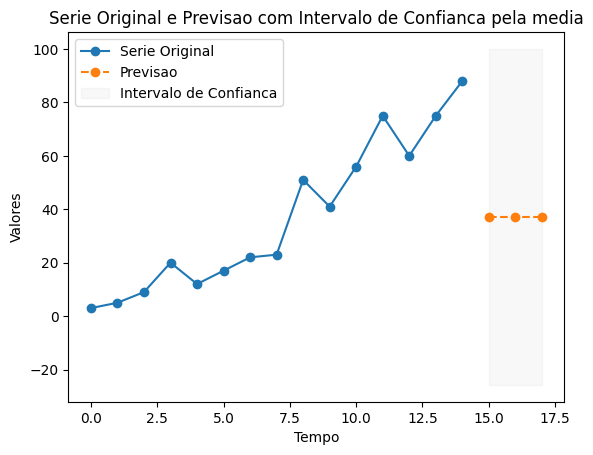

In [108]:
# In[71]: Chamar a funcao de plotagem
plot_forecast_with_mean(serie, forecast_mean, lower_bound, upper_bound, h)

### Metodo de previsao com DRIFT

In [109]:
# Funcao para calcular a previsao pelo modelo de Drift
def drift_forecast(time_series, steps_ahead, confidence=0.95):
    n = len(time_series)
    
    # Previsao pelo modelo de drift
    drift = (time_series[-1] - time_series[0]) / (n - 1)
    forecast = [time_series[-1] + (i + 1) * drift for i in range(steps_ahead)]
    
    # Calculo dos erros 
    predicted_values = []
    for i in range(1, n):
        predicted_values.append(time_series[i-1] + drift)
    
    # Calcular os erros como a diferenca entre os valores reais e os previstos
    errors = time_series[1:] - np.array(predicted_values)
    erro2=errors*errors
   
    # Calcular o desvio dos erros
    std_errors = np.sqrt(erro2.mean())
 
    # variavel auxiliar para o intervalo de confianca
    calc = len(errors)
  
    # Calcular intervalo de confianca usando o desvio padrao dos erros
    z_value = stats.norm.ppf((1 + confidence) / 2)
   
    # Limites inferior e superior
    lower_bound = [forecast[i] -
                   z_value * std_errors * np.sqrt((i+1)*(1+(i+1)/(calc -1)))
                   for i in range(steps_ahead)]
    upper_bound = [forecast[i] +
                   z_value * std_errors * np.sqrt((i+1)*(1+(i+1)/(calc -1))) 
                   for i in range(steps_ahead)]
        
    return forecast, lower_bound, upper_bound

In [110]:
# In[73]: Funcao para plotar a serie original e a previsao pelo modelo de Drift
def plot_forecast_with_drift(time_series, forecast, lower_bound,
                                            upper_bound, steps_ahead):
    # Plotar a serie original
    plt.plot(range(len(time_series)), time_series, label="Serie Original",
             marker='o')
    
    # Criar eixo de tempo para previsao
    forecast_range = range(len(time_series), len(time_series) + steps_ahead)
    
    # Plotar a previsao
    plt.plot(forecast_range, forecast, label="Previsao (Drift)", marker='o', 
             linestyle='--')
    
    # Plotar intervalo de confianca
    plt.fill_between(forecast_range, lower_bound, upper_bound, color='gray', 
                     alpha=0.05, label='Intervalo de Confianca')
    
    # Detalhes do grafico
    plt.xlabel("Tempo")
    plt.ylabel("Valores")
    plt.legend()
    plt.title("Serie Original e Previsao pelo Modelo de Drift com Intervalo de Confianca")
    plt.show()

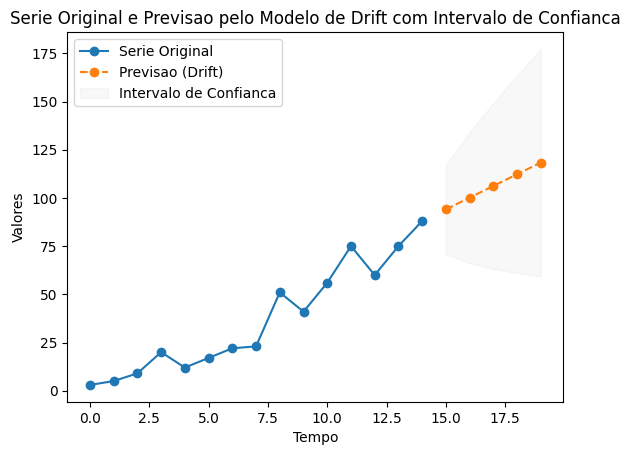

In [111]:
# In[74]: Definir numero de passos a  frente
h = 5

# Gerar previsao e intervalos de confianca pelo modelo de Drift
forecast_drift, lower_bound, upper_bound = drift_forecast(serie, h)

forecast_drift
lower_bound
upper_bound

# Chamar a funcao de plotagem
plot_forecast_with_drift(serie, forecast_drift, lower_bound, upper_bound, h)

### Metodo de previsao com NAIVE SAZONAL

In [112]:
# Funcao para rodar o modelo Naive Sazonal com intervalos de confianca
def seasonal_naive_forecast(time_series, season_length, steps_ahead, confidence=0.95):
    """
    time_series: Série temporal
    season_length: Período sazonal (ex: 12 meses para sazonalidade mensal)
    steps_ahead: O número de períodos à frente para previsão
    confidence: Nível de confiança (95% por padrão)
    """
    # Prever o valor com base na sazonalidade anterior
    forecast = [time_series.iloc[-season_length + i] for i in range(steps_ahead)]
    
    # Previsão dos valores dentro da série histórica para obter resíduos
    predicted_values = [time_series.iloc[i - season_length] for i in range(season_length, len(time_series))]
  
    # Calcular os erros residuais
    residuals = time_series.iloc[season_length:] - np.array(predicted_values)
    
    # Calcular o quadrado dos erros (resíduos)
    errors2 = residuals ** 2
    
    # Calcular o desvio padrão dos erros
    std_residuals = np.sqrt(errors2.mean())
 
    # Calcular o valor crítico z para o intervalo de confiança
    z_value = stats.norm.ppf((1 + confidence) / 2)
    
    # Calcular a margem de erro
    margin_of_error = z_value * std_residuals
    
    # Definir limites inferiores e superiores dos intervalos de confiança
    lower_bound = [forecast[i] - margin_of_error * np.sqrt((i // season_length) + 1) for i in range(steps_ahead)]
    upper_bound = [forecast[i] + margin_of_error * np.sqrt((i // season_length) + 1) for i in range(steps_ahead)]
    
    return forecast, lower_bound, upper_bound

In [113]:
# In[76]: Funcao para plotar a serie original, previsao e intervalos de confianca
def plot_seasonal_naive_forecast(time_series, forecast, lower_bound,
                                 upper_bound, steps_ahead):
    # Plotar a serie original
    plt.plot(range(len(time_series)), time_series, label="Serie Original",
             marker='o')
    
    # Criar eixo de tempo para previsao
    forecast_range = range(len(time_series), len(time_series) + steps_ahead)
    
    # Plotar a previsao
    plt.plot(forecast_range, forecast, label="Previsao (Naive Sazonal)", 
             marker='o', linestyle='--')
    
    # Plotar intervalo de confianca
    plt.fill_between(forecast_range, lower_bound, upper_bound, color='gray',
                     alpha=0.2, label='Intervalo de Confianca')
    
    # Detalhes do grafico
    plt.xlabel("Tempo")
    plt.ylabel("Valores")
    plt.legend()
    plt.title("Serie Original e Previsao pelo Modelo Naive Sazonal com Intervalo de Confianca")
    plt.show()

In [114]:
airp = pd.read_excel("/home/cairo/code/usp-ds-series-temporais/data/airpassengers.xlsx")

# Lendo a base de dados
print(airp.head())

         mes  passengers
0 2007-01-01         112
1 2007-02-01         118
2 2007-03-01         132
3 2007-04-01         129
4 2007-05-01         121


In [115]:
# In[78]: Definindo a serie temporal com frequencia mensal
airpas = pd.Series(airp.iloc[:, 1].values, 
                    index=pd.date_range(start='2007-01-01', periods=len(airp), 
                                        freq='ME'))

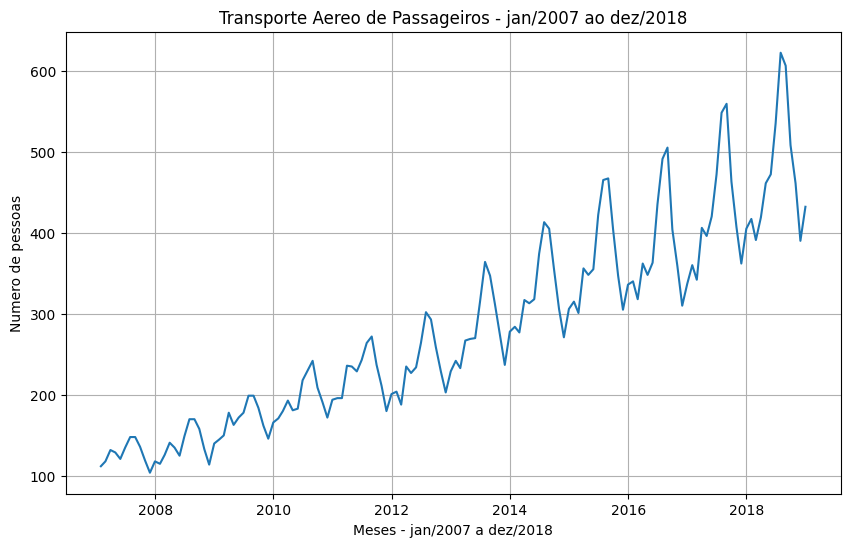

In [116]:
# In[79]: Plotando o grafico
plt.figure(figsize=(10, 6))
plt.plot(airpas)
plt.title("Transporte Aereo de Passageiros - jan/2007 ao dez/2018")
plt.xlabel("Meses - jan/2007 a dez/2018")
plt.ylabel("Numero de pessoas")
plt.grid(True)
plt.show()

In [117]:
# In[80]: Definir os parametros de sazonalidade e numero de passos a  frente
season_length = 12  # Por exemplo, 12 meses para sazonalidade anual
steps_ahead = 12  # Prevendo os proximos 12 peri­odos (um ano a  frente - h)

# In[81]: Gerar previsao e intervalos de confianca pelo modelo Naive Sazonal
forecast, lower_bound, upper_bound = seasonal_naive_forecast(airpas, 
                                                season_length, steps_ahead)

In [118]:
forecast

[np.int64(417),
 np.int64(391),
 np.int64(419),
 np.int64(461),
 np.int64(472),
 np.int64(535),
 np.int64(622),
 np.int64(606),
 np.int64(508),
 np.int64(461),
 np.int64(390),
 np.int64(432)]

In [119]:
lower_bound

[np.float64(345.8224477706716),
 np.float64(319.8224477706716),
 np.float64(347.8224477706716),
 np.float64(389.8224477706716),
 np.float64(400.8224477706716),
 np.float64(463.8224477706716),
 np.float64(550.8224477706716),
 np.float64(534.8224477706716),
 np.float64(436.8224477706716),
 np.float64(389.8224477706716),
 np.float64(318.8224477706716),
 np.float64(360.8224477706716)]

In [120]:
upper_bound

[np.float64(488.1775522293284),
 np.float64(462.1775522293284),
 np.float64(490.1775522293284),
 np.float64(532.1775522293284),
 np.float64(543.1775522293284),
 np.float64(606.1775522293284),
 np.float64(693.1775522293284),
 np.float64(677.1775522293284),
 np.float64(579.1775522293284),
 np.float64(532.1775522293284),
 np.float64(461.1775522293284),
 np.float64(503.1775522293284)]

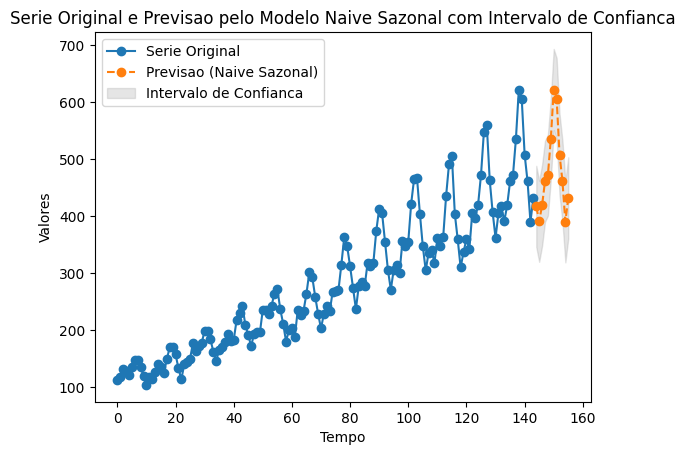

In [121]:
# Chamar a funcao de plotagem
plot_seasonal_naive_forecast(airpas, forecast, lower_bound, upper_bound, 
                             steps_ahead)

### Modelos de SUAVIZACAO EXPONENCIAL - Simples

In [122]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing, Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HW

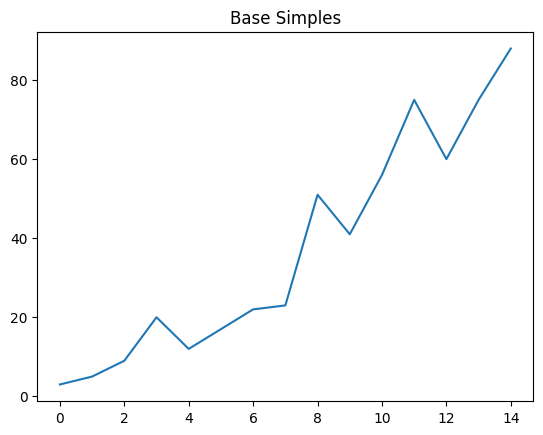

In [123]:
# Base simples
base = pd.Series([3, 5, 9, 20, 12, 17, 22, 23, 51, 41, 56, 75, 60, 75, 88])

# Visualização da base de dados
plt.plot(base)
plt.title("Base Simples")
plt.show()

## Suavização Exponencial Simples (SES) - Modelagem simples sem tendência/sazonalidade

In [124]:
# Criando o modelo SES
ses_model = SimpleExpSmoothing(base).fit()
print(ses_model.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                   None   No. Observations:                   15
Model:             SimpleExpSmoothing   SSE                           2266.445
Optimized:                       True   AIC                             79.269
Trend:                           None   BIC                             80.685
Seasonal:                        None   AICC                            83.269
Seasonal Periods:                None   Date:                 Wed, 30 Oct 2024
Box-Cox:                        False   Time:                         20:21:38
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8439153                alpha                 True
initial_level              3.0000000                

In [125]:

ses_forecast = ses_model.forecast(3)

# Visualização dos valores previstos
print("Previsões (SES):")
print(ses_forecast)

# Valores ajustados

print("Valores Ajustados (SES):")
print(ses_model.fittedvalues)

Previsões (SES):
15    85.649915
16    85.649915
17    85.649915
dtype: float64
Valores Ajustados (SES):
0      3.000000
1      3.000000
2      4.687831
3      8.326936
4     18.178013
5     12.964293
6     16.370088
7     21.121257
8     22.706757
9     46.583857
10    41.871555
11    53.794766
12    71.690187
13    61.824660
14    72.943531
dtype: float64


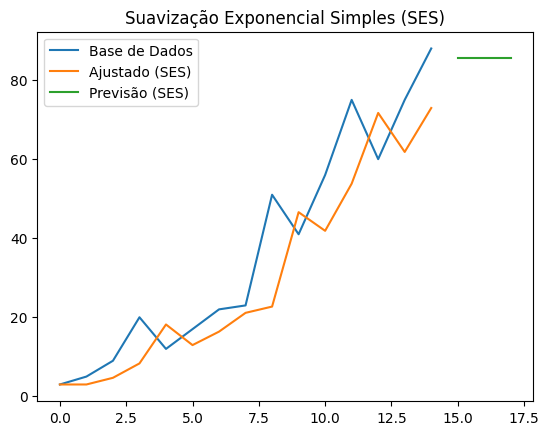

In [126]:
# In[84]: Visualização dos dados e previsões com intervalos de confiança
plt.plot(base, label="Base de Dados")
plt.plot(ses_model.fittedvalues, label="Ajustado (SES)")
plt.plot(np.arange(len(base), len(base) + 3), ses_forecast, label="Previsão (SES)")
plt.title("Suavização Exponencial Simples (SES)")
plt.legend()
plt.show()

## Modelo de Holt com Tendência

In [127]:
# Modelo Holt
holt_model = Holt(base).fit()
print(holt_model.summary())

                              Holt Model Results                              
Dep. Variable:                   None   No. Observations:                   15
Model:                           Holt   SSE                           1344.774
Optimized:                       True   AIC                             75.439
Trend:                       Additive   BIC                             78.271
Seasonal:                        None   AICC                            85.939
Seasonal Periods:                None   Date:                 Wed, 30 Oct 2024
Box-Cox:                        False   Time:                         20:21:38
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3854484                alpha                 True
smoothing_trend            0.3854484                

Previsão com Holt: 
15     93.376594
16    101.484464
17    109.592334
dtype: float64


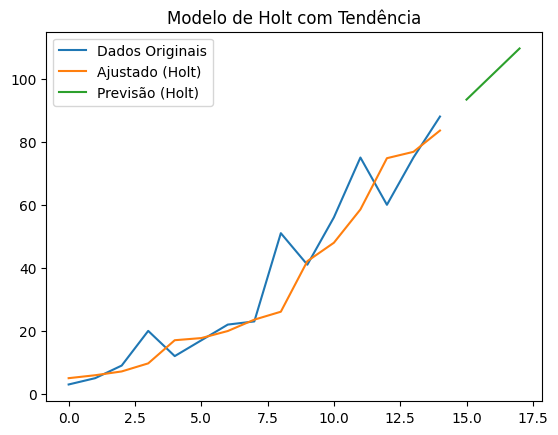

In [128]:
holt_forecast = holt_model.forecast(3)

# Visualizando os valores previstos
print("Previsão com Holt: ")
print(holt_forecast)

# In[86]: Visualização dos dados e previsões
plt.plot(base, label="Dados Originais")
plt.plot(holt_model.fittedvalues, label="Ajustado (Holt)")
plt.plot(np.arange(len(base), len(base) + 3), holt_forecast, label="Previsão (Holt)")
plt.title("Modelo de Holt com Tendência")
plt.legend()
plt.show()

## Modelo Holt-Winters com Tendência (Holt-Winters atribuindo a tendencia)

In [129]:

ajuste2 = HW(base, trend='add', seasonal=None).fit()
print(ajuste2.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     None   No. Observations:                   15
Model:             ExponentialSmoothing   SSE                            980.444
Optimized:                         True   AIC                             70.699
Trend:                         Additive   BIC                             73.532
Seasonal:                          None   AICC                            81.199
Seasonal Periods:                  None   Date:                 Wed, 30 Oct 2024
Box-Cox:                          False   Time:                         20:21:39
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level           1.4901e-08                alpha                 True
smoothing_trend             0.0000

In [130]:
fitted_ajuste2 = ajuste2.fittedvalues
print("Valores ajustados (Holt-Winters com tendência):")
print(fitted_ajuste2)

Valores ajustados (Holt-Winters com tendência):
0     -5.341665
1      0.726192
2      6.794049
3     12.861906
4     18.929763
5     24.997620
6     31.065477
7     37.133334
8     43.201191
9     49.269048
10    55.336905
11    61.404762
12    67.472619
13    73.540476
14    79.608333
dtype: float64


In [131]:
# Previsão de 5 passos à frente
prevajuste2 = ajuste2.forecast(5)
print("Previsão para os próximos 5 períodos:")
print(prevajuste2)

Previsão para os próximos 5 períodos:
15     85.676190
16     91.744047
17     97.811904
18    103.879762
19    109.947619
dtype: float64


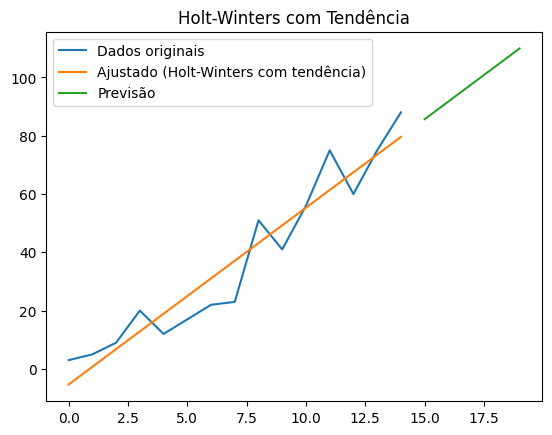

In [132]:
# In[88]: Visualização dos dados ajustados e previsão
plt.plot(base, label="Dados originais")
plt.plot(fitted_ajuste2, label="Ajustado (Holt-Winters com tendência)")
plt.plot(np.arange(len(base), len(base) + 5), prevajuste2, label="Previsão")
plt.title("Holt-Winters com Tendência")
plt.legend()
plt.show()

## Modelo de Holt-Winters com Tendência e Sazonalidade

In [133]:
# Nova base de dados com sazonalidade
base2 = pd.Series([10, 14, 8, 25, 16, 22, 14, 35, 15, 27, 18, 40, 28, 40, 25, 65],
                  index=pd.date_range(start='2019-01-01', periods=16, freq='Q'))


def plot_holtwinters(model, fitted_values, forecast, model_type):
    plt.figure(figsize=(10, 6))

    # Obter datas para o período da previsão
    forecast_index = pd.date_range(start=base2.index[-1] + pd.offsets.QuarterEnd(), periods=len(forecast), freq='Q')

    # Plotando os dados originais, ajustados e previsão
    plt.plot(base2.index, base2, label="Dados Originais", marker='o', color='blue')
    plt.plot(base2.index, fitted_values, label="Valores Ajustados", marker='o', color='green')
    plt.plot(forecast_index, forecast, label="Previsão", marker='o', color='red')

    # Intervalo de confiança
    plt.fill_between(forecast_index, forecast * 0.95, forecast * 1.05, color='gray', alpha=0.2, label="Intervalo de Confiança 95%")

    plt.title(f"Modelo Holt-Winters ({model_type})", fontsize=14)
    plt.xlabel("Período", fontsize=12)
    plt.ylabel("Valores", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_6157/719816123.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  index=pd.date_range(start='2019-01-01', periods=16, freq='Q'))


In [134]:
# In[90]: Modelo Holt-Winters Aditivo
ajuste4 = HW(base2, trend='add', seasonal='add', seasonal_periods=4).fit()
fitted_ajuste4 = ajuste4.fittedvalues
print(ajuste4.summary())

prevajuste4 = ajuste4.forecast(4)
print("Previsão para os próximos 4 períodos:")
print(prevajuste4)

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     None   No. Observations:                   16
Model:             ExponentialSmoothing   SSE                            351.415
Optimized:                         True   AIC                             65.430
Trend:                         Additive   BIC                             71.611
Seasonal:                      Additive   AICC                           109.430
Seasonal Periods:                     4   Date:                 Wed, 30 Oct 2024
Box-Cox:                          False   Time:                         20:21:39
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.4028303                alpha                 True
smoothing_trend          

/tmp/ipykernel_6157/719816123.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_index = pd.date_range(start=base2.index[-1] + pd.offsets.QuarterEnd(), periods=len(forecast), freq='Q')


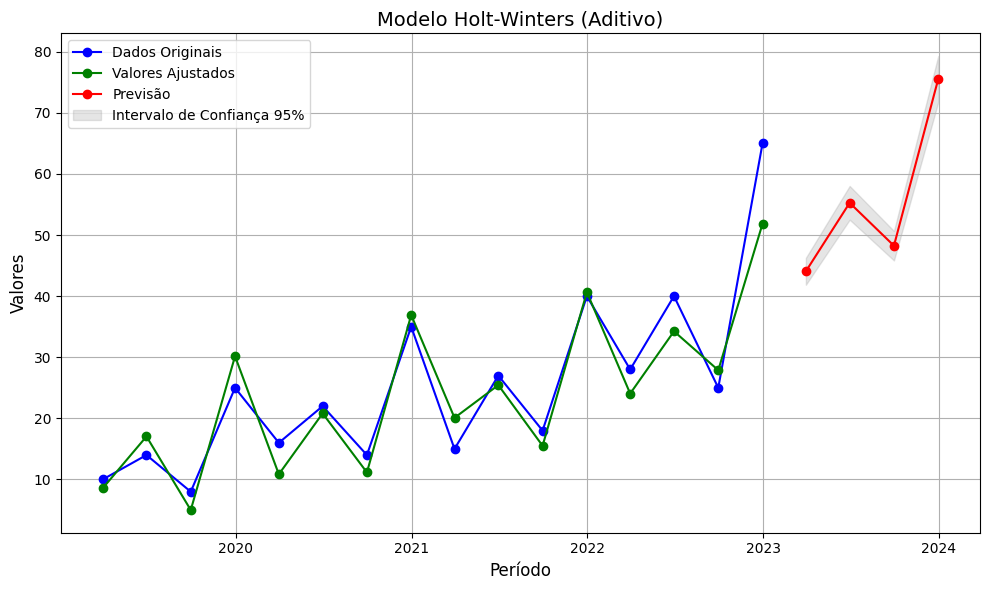

In [135]:
# In[91]: Gráfico do modelo aditivo
plot_holtwinters(ajuste4, fitted_ajuste4, prevajuste4, model_type="Aditivo")

In [136]:
# In[92]: Modelo Holt-Winters Multiplicativo
ajuste5 = HW(base2, trend='add', seasonal='mul', seasonal_periods=4).fit()
fitted_ajuste5 = ajuste5.fittedvalues
print(ajuste5.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     None   No. Observations:                   16
Model:             ExponentialSmoothing   SSE                             91.697
Optimized:                         True   AIC                             43.934
Trend:                         Additive   BIC                             50.115
Seasonal:                Multiplicative   AICC                            87.934
Seasonal Periods:                     4   Date:                 Wed, 30 Oct 2024
Box-Cox:                          False   Time:                         20:21:40
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.4735677                alpha                 True
smoothing_trend          

In [137]:
prevajuste5 = ajuste5.forecast(4)
prevajuste5

2023-03-31    37.154284
2023-06-30    55.925434
2023-09-30    34.051746
2023-12-31    86.121279
Freq: QE-DEC, dtype: float64

/tmp/ipykernel_6157/719816123.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_index = pd.date_range(start=base2.index[-1] + pd.offsets.QuarterEnd(), periods=len(forecast), freq='Q')


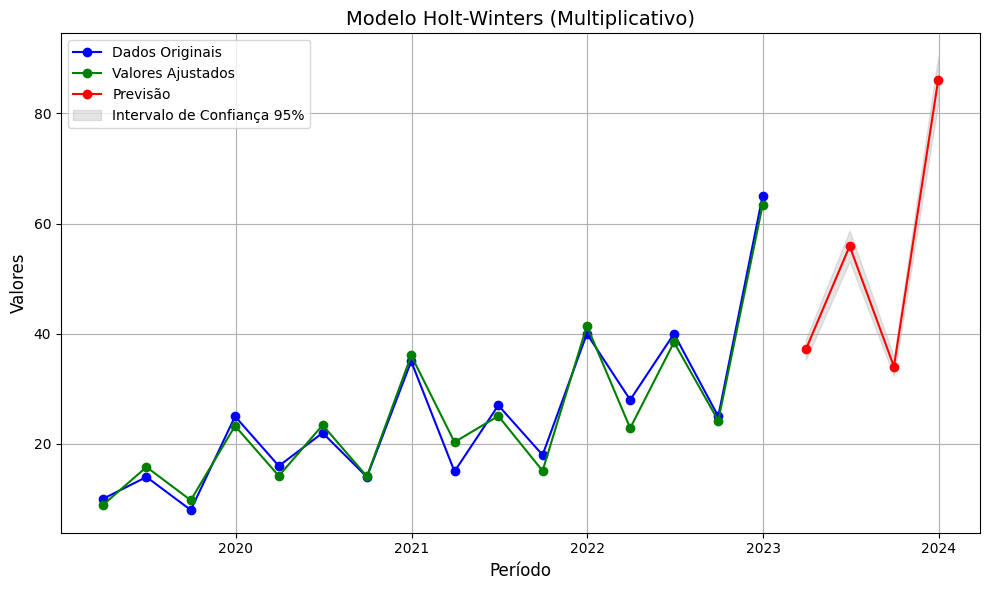

In [138]:
# In[93]: Gráfico do modelo multiplicativo
plot_holtwinters(ajuste5, fitted_ajuste5, prevajuste5, model_type="Multiplicativo")

### COMPARANDO AGORA OS MODELOS DE PREVISAO

In [139]:
# importação dos pacotes
from sklearn.metrics import mean_absolute_percentage_error as mape
#from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing, Holt
#from statsmodels.tsa.stattools import acf
#from statsmodels.tsa.forecasting.stl import STLForecast
#from statsmodels.tsa.forecasting.theta import ThetaModel
import statsmodels.api as sm

In [140]:
# Separar a base de dados em treino e teste (janela de dados) para a série da AMBEV
ambev = pd.read_excel("/home/cairo/code/usp-ds-series-temporais/data/ambev.xlsx")
ambev.head()

,Data,receita_ac,receita_t
0,2000-03-31,877.498,877.498
1,2000-06-30,1690.009,812.511
2,2000-09-30,3522.524,1832.515
3,2000-12-31,5250.345,1727.821
4,2001-03-31,1515.505,1515.505


In [141]:
receita=pd.Series(ambev.iloc[:,2].values,
                  index=pd.date_range(start='2000-01-01', periods=len(ambev),
                                      freq='Q'))
bambev = receita[:-9]
reais = receita[-9:]

# In[96]: Lista para armazenar os MAPE
modelos = []
mapes = []

/tmp/ipykernel_6157/1697440560.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  index=pd.date_range(start='2000-01-01', periods=len(ambev),


In [142]:
bambev

2000-03-31      877.498
2000-06-30      812.511
2000-09-30     1832.515
2000-12-31     1727.821
2001-03-31     1515.505
                ...    
2020-12-31    18556.570
2021-03-31    16639.761
2021-06-30    15711.141
2021-09-30    18492.609
2021-12-31    22010.833
Freq: QE-DEC, Length: 88, dtype: float64

In [143]:
reais

2022-03-31    18439.152
2022-06-30    17988.995
2022-09-30    20587.642
2022-12-31    12816.736
2023-03-31    20531.740
2023-06-30    18898.120
2023-09-30    20317.760
2023-12-31    19989.240
2024-03-31    20276.300
Freq: QE-DEC, dtype: float64

In [144]:
# Modelo Naive
naive_forecast = pd.Series([bambev.iloc[-1]] * len(reais), index=reais.index)
print(naive_forecast)

2022-03-31    22010.833
2022-06-30    22010.833
2022-09-30    22010.833
2022-12-31    22010.833
2023-03-31    22010.833
2023-06-30    22010.833
2023-09-30    22010.833
2023-12-31    22010.833
2024-03-31    22010.833
Freq: QE-DEC, dtype: float64


In [145]:
mape_naive = mape(reais, naive_forecast)*100
modelos.append("Naive")
mapes.append(mape_naive)
print(mape_naive)

19.0056724768691


In [146]:
# Modelo Mean (média)
mean_forecast = pd.Series(bambev.mean(), index=reais.index)
print(mean_forecast)

2022-03-31    7600.617773
2022-06-30    7600.617773
2022-09-30    7600.617773
2022-12-31    7600.617773
2023-03-31    7600.617773
2023-06-30    7600.617773
2023-09-30    7600.617773
2023-12-31    7600.617773
2024-03-31    7600.617773
Freq: QE-DEC, dtype: float64


In [147]:
mape_mean = mape(reais, mean_forecast)*100
modelos.append("Mean")
mapes.append(mape_mean)
print(mape_mean)

58.90584289640232


In [148]:
# Modelo Drift
n = len(bambev)
drift_slope = (bambev.iloc[-1] - bambev.iloc[0]) / (n - 1)
drift_forecast = bambev.iloc[-1] + drift_slope * np.arange(1, len(reais) + 1)
drift_forecast = pd.Series(drift_forecast, index=reais.index)
print(drift_forecast)

2022-03-31    22253.744897
2022-06-30    22496.656793
2022-09-30    22739.568690
2022-12-31    22982.480586
2023-03-31    23225.392483
2023-06-30    23468.304379
2023-09-30    23711.216276
2023-12-31    23954.128172
2024-03-31    24197.040069
Freq: QE-DEC, dtype: float64


In [149]:
mape_drift = mape(reais, drift_forecast)*100
mapes.append(mape_drift)
modelos.append("Drift")
print(mape_drift)

25.4100410549693


In [150]:
# Modelo Naive Sazonal
naive_sazonal_forecast = pd.Series([bambev.iloc[-4 + (i % 4)]
                                    for i in range(len(reais))],
                                   index=reais.index)
print(naive_sazonal_forecast)

2022-03-31    16639.761
2022-06-30    15711.141
2022-09-30    18492.609
2022-12-31    22010.833
2023-03-31    16639.761
2023-06-30    15711.141
2023-09-30    18492.609
2023-12-31    22010.833
2024-03-31    16639.761
Freq: QE-DEC, dtype: float64


In [151]:
mape_naive_sazonal = mape(reais, naive_sazonal_forecast)*100
modelos.append("Naive Sazonal")
mapes.append(mape_naive_sazonal)
print(mape_naive_sazonal)

19.687061617233034


In [152]:
# Suavização Exponencial Simples (SES)
ses_model = SimpleExpSmoothing(bambev).fit()
ses_forecast = ses_model.forecast(steps=len(reais))
print(ses_forecast)

2022-03-31    19201.341204
2022-06-30    19201.341204
2022-09-30    19201.341204
2022-12-31    19201.341204
2023-03-31    19201.341204
2023-06-30    19201.341204
2023-09-30    19201.341204
2023-12-31    19201.341204
2024-03-31    19201.341204
Freq: QE-DEC, dtype: float64


In [153]:
mape_ses = mape(reais, ses_forecast)*100
modelos.append("SES")
mapes.append(mape_ses)
print(mape_ses)

10.02703861177792


In [154]:
# Holt com Tendência
holt_model = Holt(bambev).fit()
holt_forecast = holt_model.forecast(steps=len(reais))
print(holt_forecast)

2022-03-31    19650.109073
2022-06-30    20511.537522
2022-09-30    21372.965971
2022-12-31    22234.394419
2023-03-31    23095.822868
2023-06-30    23957.251317
2023-09-30    24818.679765
2023-12-31    25680.108214
2024-03-31    26541.536663
Freq: QE-DEC, dtype: float64


In [155]:
mape_holt = mape(reais, holt_forecast)*100
modelos.append("Holt")
mapes.append(mape_holt)
print(mape_holt)

24.296053270452823


In [156]:
# Holt-Winters Aditivo
hw_add_model = ExponentialSmoothing(bambev, seasonal_periods=4, trend='add', seasonal='add').fit()
hw_add_forecast = hw_add_model.forecast(steps=len(reais))
print(hw_add_forecast)

2022-03-31    19034.866343
2022-06-30    18176.571180
2022-09-30    20409.604009
2022-12-31    23156.538014
2023-03-31    20573.165945
2023-06-30    19714.870782
2023-09-30    21947.903611
2023-12-31    24694.837616
2024-03-31    22111.465547
Freq: QE-DEC, dtype: float64


In [157]:
mape_hw_add = mape(reais, hw_add_forecast)*100
modelos.append("Holt-Winters Aditivo")
mapes.append(mape_hw_add)
print(mape_hw_add)

14.550083365772315


In [158]:
# Holt-Winters Multiplicativo
hw_mult_model = ExponentialSmoothing(bambev, seasonal_periods=4, trend='add', seasonal='mul').fit()
hw_mult_forecast = hw_mult_model.forecast(steps=len(reais))
print(hw_mult_forecast)

2022-03-31    18423.105663
2022-06-30    17180.469733
2022-09-30    18823.293994
2022-12-31    24010.675097
2023-03-31    19717.543565
2023-06-30    18366.760293
2023-09-30    20100.964180
2023-12-31    25613.254943
2024-03-31    21011.981468
Freq: QE-DEC, dtype: float64


In [159]:
mape_hw_mult = mape(reais, hw_mult_forecast)*100
modelos.append("Holt-Winters Multiplicativo")
mapes.append(mape_hw_mult)
print(mape_hw_mult)

15.56641629457446


                        Modelo       MAPE
0                         Mean  58.905843
1                        Drift  25.410041
2                         Holt  24.296053
3                Naive Sazonal  19.687062
4                        Naive  19.005672
5  Holt-Winters Multiplicativo  15.566416
6         Holt-Winters Aditivo  14.550083
7                          SES  10.027039


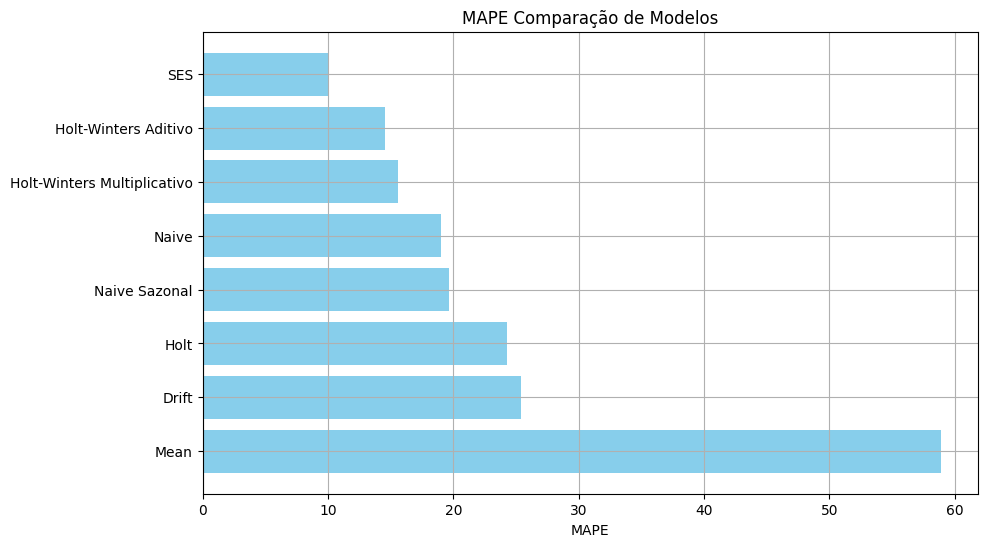

In [160]:
# Comparação dos modelos com base no MAPE
mape_comparison = pd.DataFrame({'Modelo': modelos, 'MAPE': mapes})
mape_comparison = mape_comparison.sort_values(by='MAPE', ascending=False).reset_index(drop=True)
print(mape_comparison)

# In[106]:
# Visualizar os MAPE dos modelos em ordem decrescente
plt.figure(figsize=(10, 6))
plt.barh(mape_comparison['Modelo'], mape_comparison['MAPE'], color='skyblue')
plt.xlabel("MAPE")
plt.title("MAPE Comparação de Modelos")
plt.grid(True)
plt.show()

## MODELO ETS

In [161]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [163]:
# Importando os dados da série temporal da Ambev
#ambev = pd.read_excel('ambev.xlsx')
ambev.head()

receita=pd.Series(ambev.iloc[:,2].values,
                  index=pd.date_range(start='2000-01-01', periods=len(ambev),
                                      freq='QE'))

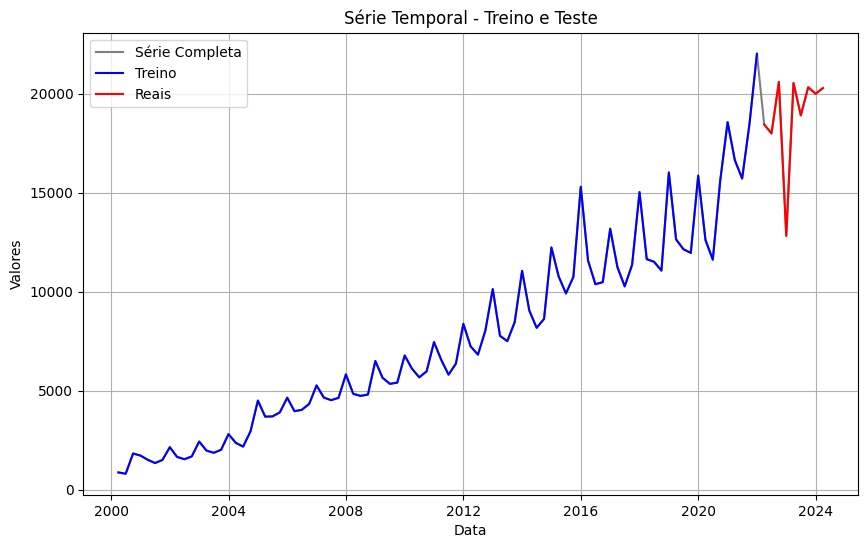

In [164]:
# Separar a base de dados em treino e teste (janela de dados)
bambev = receita[:-9]
reais = receita[-9:]

# In[108]: Visualizando a série temporal de treino e teste
plt.figure(figsize=(10, 6))
plt.plot(receita.index, receita, label="Série Completa", color='gray')
plt.plot(bambev.index, bambev, label="Treino", color='blue')
plt.plot(reais.index, reais, label="Reais", color='red')
plt.title("Série Temporal - Treino e Teste")
plt.xlabel("Data")
plt.ylabel("Valores")
plt.legend()
plt.grid(True)
plt.show()

In [165]:
# In[109]: Definir todas as combinações possíveis de modelos para ETS
configs = [
    {'trend': None, 'seasonal': None},
    {'trend': 'add', 'seasonal': None},
    {'trend': None, 'seasonal': 'add'},
    {'trend': 'add', 'seasonal': 'add'}
]

best_aic = float('inf')
best_config = None
best_model = None

# In[110]: Ajustar os modelos com diferentes configurações e comparar AIC
for config in configs:
    try:
        model = ExponentialSmoothing(bambev, seasonal_periods=4, trend=config['trend'], seasonal=config['seasonal']).fit()
        aic = model.aic

        if aic < best_aic:
            best_aic = aic
            best_config = config
            best_model = model
    except Exception as e:
        pass  # Ignorar configurações que não funcionam

# In[111]: Exibir o melhor modelo com base no AIC
print(f"Melhor configuração: {best_config} com AIC = {best_aic}")
print(best_model.summary())

# In[112]: Previsão de 9 passos à frente com o melhor modelo
best_forecasts = best_model.forecast(steps=9)
print("Previsão para os próximos 9 períodos:")
print(best_forecasts)

# In[113]: Cálculo do MAPE entre a previsão e os valores reais
quali_ETS = mape(reais, best_forecasts)*100
print("MAPE ETS:", quali_ETS)

Melhor configuração: {'trend': 'add', 'seasonal': 'add'} com AIC = 1164.1657407219127
                       ExponentialSmoothing Model Results                       
Dep. Variable:                     None   No. Observations:                   88
Model:             ExponentialSmoothing   SSE                       40819675.967
Optimized:                         True   AIC                           1164.166
Trend:                         Additive   BIC                           1183.984
Seasonal:                      Additive   AICC                          1167.023
Seasonal Periods:                     4   Date:                 Wed, 30 Oct 2024
Box-Cox:                          False   Time:                         20:22:58
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level      

/tmp/ipykernel_6157/115851440.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  plt.plot(pd.date_range(start=reais.index[0], periods=len(best_forecasts), freq='Q'),


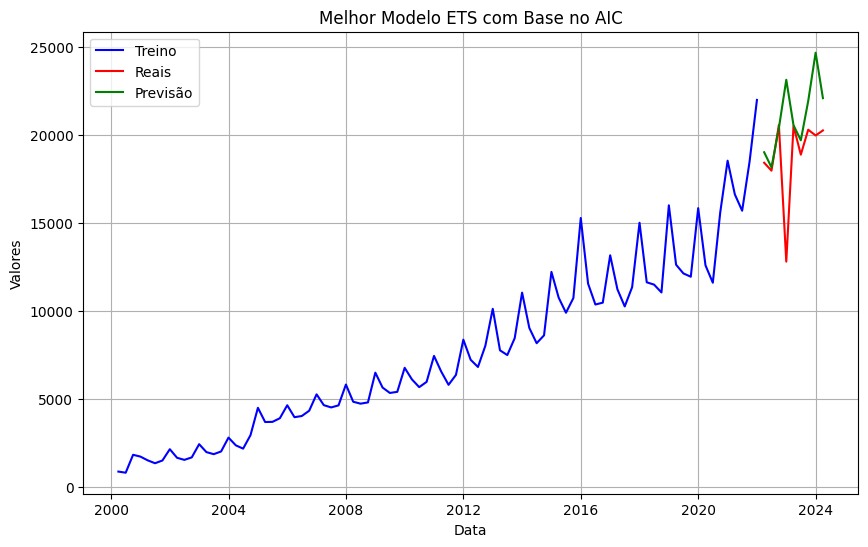

In [166]:
# In[114]: Visualização da série de treino, valores reais (teste) e previsões
plt.figure(figsize=(10, 6))
plt.plot(bambev.index, bambev, label="Treino", color='blue')
plt.plot(reais.index, reais, label="Reais", color='red')
plt.plot(pd.date_range(start=reais.index[0], periods=len(best_forecasts), freq='Q'),
         best_forecasts, label="Previsão", color='green')
plt.title("Melhor Modelo ETS com Base no AIC")
plt.xlabel("Data")
plt.ylabel("Valores")
plt.legend()
plt.grid(True)
plt.show()

### Teste de Ljung-Box nos resíduos

In [167]:
# Resíduos do modelo ETS
residuals = best_model.resid

# Teste de Ljung-Box
ljung_box_result = acorr_ljungbox(residuals, lags=[30], return_df=True)
print("Resultado do Teste de Ljung-Box:")
print(ljung_box_result)

Resultado do Teste de Ljung-Box:
      lb_stat  lb_pvalue
30  28.751206   0.530693


In [168]:
# In[116]: Interpretação do p-valor
if ljung_box_result['lb_pvalue'].values[0] > 0.05:
    print("Aceitamos H0: Os resíduos são independentes (iid). O modelo está bem ajustado.")
else:
    print("Rejeitamos H0: Os resíduos não são iid. O modelo apresenta falhas de ajuste.")

Aceitamos H0: Os resíduos são independentes (iid). O modelo está bem ajustado.


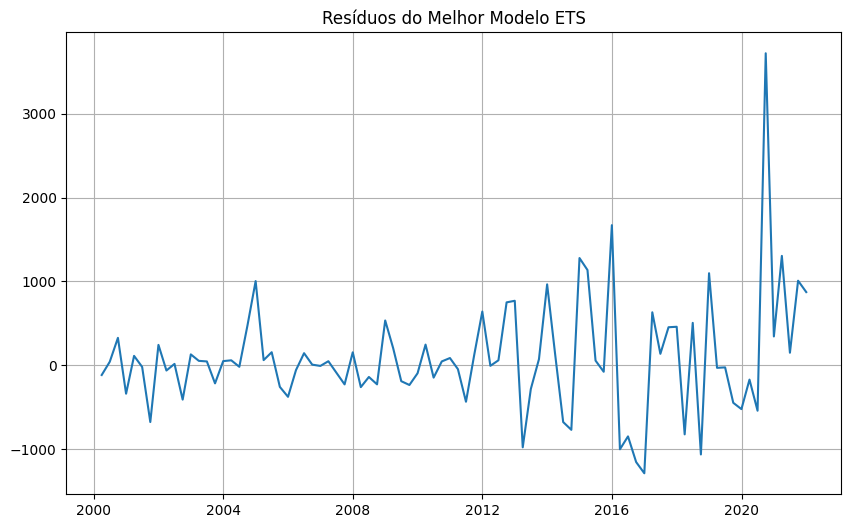

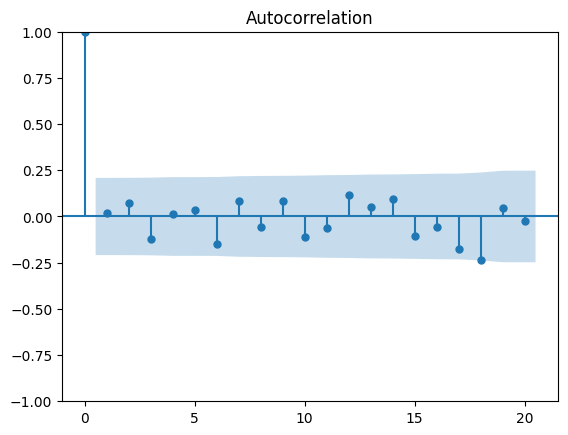

In [169]:
# In[117]: Visualização dos resíduos
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Resíduos")
plt.title("Resíduos do Melhor Modelo ETS")
plt.grid(True)
plt.show()

# In[118]: ACF dos resíduos
sm.graphics.tsa.plot_acf(residuals)
plt.show()

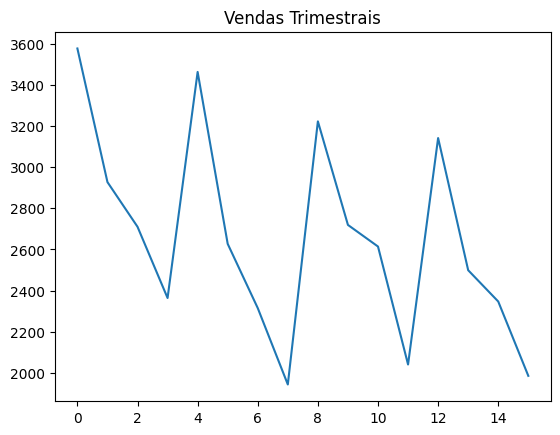

In [170]:
# Base Vendas Trimestrais
base_vendas = pd.Series([3576, 2927, 2710, 2364, 3462, 2627, 2315, 1944, 3222, 2719, 2614, 2041, 3141,
 2499, 2347, 1986])

# Visualização da base de dados
plt.plot(base_vendas)
plt.title("Vendas Trimestrais")
plt.show()

In [171]:
# In[120]: Ajustar os modelos com diferentes configurações e comparar AIC
for config in configs:
    try:
        model = ExponentialSmoothing(base_vendas, seasonal_periods=4, trend=config['trend'], seasonal=config['seasonal']).fit()
        aic = model.aic

        if aic < best_aic:
            best_aic = aic
            best_config = config
            best_model = model
    except Exception as e:
        pass  # Ignorar configurações que não funcionam

In [172]:
# In[121]: Exibir o melhor modelo com base no AIC
print(f"Melhor configuração: {best_config} com AIC = {best_aic}")
print(best_model.summary())

Melhor configuração: {'trend': None, 'seasonal': 'add'} com AIC = 158.02137525782587
                       ExponentialSmoothing Model Results                       
Dep. Variable:                     None   No. Observations:                   16
Model:             ExponentialSmoothing   SSE                         147108.351
Optimized:                         True   AIC                            158.021
Trend:                             None   BIC                            162.657
Seasonal:                      Additive   AICC                           178.593
Seasonal Periods:                     4   Date:                 Wed, 30 Oct 2024
Box-Cox:                          False   Time:                         20:24:49
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level       

In [173]:
# In[122]: Previsão de 4 passos à frente com o melhor modelo
best_forecasts = best_model.forecast(steps=4)
print("Previsão para os próximos 4 períodos:")
print(best_forecasts)

Previsão para os próximos 4 períodos:
16    3178.427981
17    2543.916124
18    2374.456775
19    1985.876029
dtype: float64
